# Audio Classification Data Preprosessing

In [1]:
import librosa
audio_path=r'D:\Data science\Audio classification\sound\UrbanSound8K\audio\fold1\7061-6-0-0.wav'

In [2]:
# Read Audio data using librosa
lib_audio_data , lib_sample_rate = librosa.load(audio_path)

In [3]:
print(lib_audio_data)

[-7.4505806e-09  2.9802322e-08  4.8428774e-08 ...  1.0127544e-05
  2.3271263e-05  7.0009992e-06]


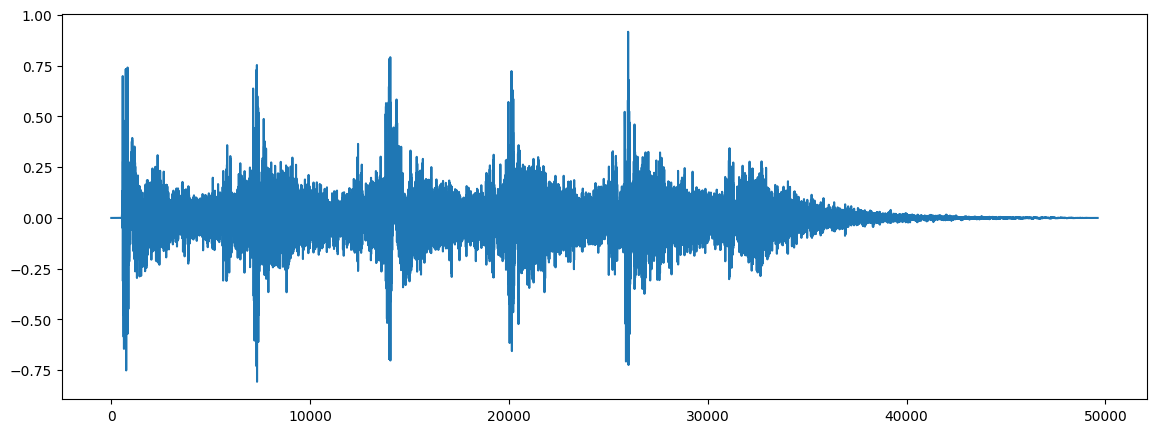

In [4]:
# Lets plot the librosa data
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(14,5))
plt.plot(lib_audio_data)

**Obesevation**

Here librsoa converts to mono , meaning the channe will always be 1.

In [5]:
# Lets read with scipy
from scipy.io import wavfile as wav
wav_sample_rate , wav_audio = wav.read(r"D:\Data science\Audio classification\sound\UrbanSound8K\audio\fold1\7061-6-0-0.wav")

In [6]:
wav_audio

array([[0, 0],
       [0, 0],
       [0, 0],
       ...,
       [1, 0],
       [1, 1],
       [0, 0]], dtype=int16)

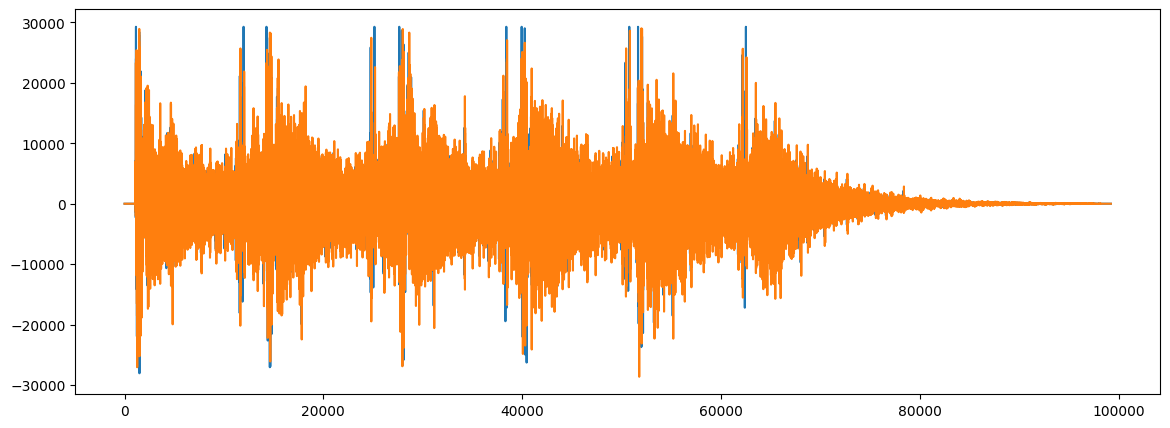

In [7]:
#lets plot scipy audio
plt.figure(figsize=(14,5))
plt.plot(wav_audio)

#**Feature extraction**
Here we will be using Mel-Frequency Cepstral Coefficients(MFCC) from the audio samples. The MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. These audio representations will allow us to identify features for classification.

In [8]:
mfccs=librosa.feature.mfcc(y=lib_audio_data, sr=lib_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 97)


In [9]:
mfccs

array([[-1.27213120e+02,  8.04792309e+00,  1.60044117e+01, ...,
        -5.69353333e+02, -5.91727539e+02, -6.10657837e+02],
       [ 3.00206680e+01,  2.29403458e+01,  1.06696825e+01, ...,
         4.30511932e+01,  2.58880424e+01,  1.28297863e+01],
       [-2.53601527e+00, -1.12524347e+01, -1.42598028e+01, ...,
        -1.11037216e+01, -7.55062675e+00,  2.01516181e-01],
       ...,
       [ 3.23359370e-01, -3.54810238e+00, -5.02934170e+00, ...,
         2.40957808e+00,  3.16997290e+00, -2.12704271e-01],
       [-9.78005791e+00, -9.09051418e+00, -6.19126511e+00, ...,
        -5.01989722e-02,  7.28950679e-01, -9.00552452e-01],
       [ 1.65660751e+00,  1.82233334e+00,  2.83062172e+00, ...,
        -2.06092119e+00, -2.23126698e+00, -1.77458608e+00]], dtype=float32)

In [10]:
# Extract mfcc for every audio file
import pandas as pd
import os
import numpy as np

audio_dataset_path=r'D:\Data science\Audio classification\sound\UrbanSound8K\audio'
metadata= pd.read_csv(r'D:\Data science\Audio classification\sound\UrbanSound8K\metadata\UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [11]:
def feature_extractor(file_name):
  audio, sample_rate = librosa.load(file_name)
  mfcc_features = librosa.feature.mfcc(y=audio ,sr= sample_rate, n_mfcc=40 )
  mfccs_scaled = np.mean(mfcc_features.T, axis=0)

  return mfccs_scaled

In [12]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features
### using Mel-Frequency Cepstral Coefficients
extract_features=[]
for item_num,row in tqdm(metadata.iterrows()):
  file_name=os.path.join(os.path.abspath(audio_dataset_path), 'fold'+str(row['fold'])+'/',str(row['slice_file_name']))
  final_class_label = row['class']
  data = feature_extractor(file_name)
  extract_features.append([data,final_class_label])

3552it [00:51, 72.74it/s] C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
8325it [02:12, 59.15it/s]C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
8732it [02:20, 61.99it/s]


In [13]:
extracted_features_df = pd.DataFrame(extract_features,columns=['features','class'])
extracted_features_df .head()

,features,class
0,"[-211.93698, 62.581207, -122.81315, -60.74528,...",dog_bark
1,"[-417.0052, 99.336624, -42.995586, 51.073326, ...",children_playing
2,"[-452.39316, 112.36253, -37.57807, 43.19587, 8...",children_playing
3,"[-406.47922, 91.1966, -25.043556, 42.78452, 11...",children_playing
4,"[-439.63873, 103.86223, -42.658787, 50.690277,...",children_playing


In [14]:
X = np.array(extracted_features_df['features'].tolist())
Y = np.array(extracted_features_df['class'].tolist())

In [15]:
X.shape,Y.shape

((8732, 40), (8732,))

In [16]:
Y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [17]:
### Label Encoding
###y=np.array(pd.get_dummies(y))
### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y = to_categorical(labelencoder.fit_transform(Y))

In [18]:
#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y ,random_state=42,test_size=0.30)

In [19]:
x_train

array([[-3.3118118e+02,  2.4736285e+02, -2.5837990e+01, ...,
         7.2538078e-01, -2.5414884e-01, -3.0099085e-01],
       [-2.1710016e+02,  4.3616577e+01, -3.6118183e+01, ...,
         3.0061431e+00, -1.9708245e+00,  5.0312829e-01],
       [-4.7440634e+02,  7.1999786e+01, -3.4595368e+00, ...,
         6.8759269e-01,  2.7722502e-01, -1.0763355e+00],
       ...,
       [-2.9107108e+02,  2.3318919e+02, -4.6693287e+00, ...,
         3.0151722e-01, -3.3626395e-01, -4.3078698e-02],
       [-1.9410327e+02,  8.2565353e+01, -7.0069725e+01, ...,
         6.1443740e-01, -3.2263095e+00,  6.2073197e+00],
       [-2.6350113e+02,  1.2405038e+02,  2.5122182e+00, ...,
        -8.2891124e-01, -2.7479589e+00,  7.6125252e-01]], dtype=float32)

In [20]:
x_train.shape,x_test.shape

((6112, 40), (2620, 40))

In [21]:
y_train.shape,y_test.shape

((6112, 10), (2620, 10))

In [22]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

## model creation

In [23]:
import tensorflow as tf
print(tf.__version__)

2.16.1


In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten,Activation
from tensorflow.keras.optimizers import Adam
from sklearn import metrics 

In [25]:
# No of Classes
num_labels = y.shape[1]

In [26]:
model = Sequential()
#first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
#Second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
#third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

#final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │         4,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 200)            │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,410 (177.38 KB)

 Trainable params: 45,410 (177.38 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='Adam')

In [29]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [30]:
# training model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs=100
batch_size=32

checkpoint= model.save(filepath='D:\Data science\Audio classification\Audio_classification.hdf5')

start = datetime.now()

model.fit(x_train,y_train,batch_size=batch_size,epochs=num_epochs,validation_data=(x_test,y_test),verbose=1)

duration = datetime.now() - start

print('training completed in time',duration)

Epoch 1/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1107 - loss: 26.6788 - val_accuracy: 0.1195 - val_loss: 2.2819
Epoch 2/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1305 - loss: 3.0405 - val_accuracy: 0.1256 - val_loss: 2.2820
Epoch 3/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1077 - loss: 2.4653 - val_accuracy: 0.1248 - val_loss: 2.2725
Epoch 4/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1167 - loss: 2.3363 - val_accuracy: 0.1309 - val_loss: 2.2622
Epoch 5/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1130 - loss: 2.2954 - val_accuracy: 0.1366 - val_loss: 2.2470
Epoch 6/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1261 - loss: 2.2711 - val_accuracy: 0.1431 - val_loss: 2.2389
Epoch 7/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1375 - loss: 2.2475 - val_accuracy: 0.1412 - val_loss: 2.2267
Epoch 8/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1513 - loss: 2.2414 - val_acc

In [31]:
test_accuracy = model.evaluate(x_test,y_test,verbose=1)
print(test_accuracy[1])

82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7721 - loss: 0.7846
0.7664121985435486


### Testing audio data

Steps
* Preprocess the new audio data using mfcc
* Predict the classes
* Inverse trasform the Predictied class label

In [53]:
#REad Raw audio data
new_file= r'D:\Data science\Audio classification\sound\UrbanSound8K\siren.wav'

#Appling mfcc for audio feature extraction(feature extractor function)
mfcc_scaled = feature_extractor(new_file)

# Check shape
print(mfcc_scaled.shape)   

# reshape  to (1,40)                      
mfccs_feature_scaled = mfcc_scaled.reshape(1,-1)
print(mfccs_feature_scaled)
mfccs_feature_scaled.shape

(40,)
[[-131.87776      81.54557     -56.753998     17.231575      3.3527172
    -4.602038     12.173431     -2.2941542    -7.318869      6.9665294
    -3.4707835    -4.468126      3.4220002     3.6190984    12.470244
    14.9875       -5.8992248   -11.743734     -8.818626     -0.15789677
    12.533593      2.8477314   -14.438925     -0.1447783     1.1929197
    11.589918     -3.4711604    -1.5714949    16.020596     15.280872
   -11.442964    -17.475134      3.0066385     2.8261306    -5.428725
    -2.4484658    -1.7670704   -14.060887     -9.555321     10.637352  ]]


(1, 40)

In [78]:
# predict mfccs_feature_scaled for multi-class
prediction=model.predict(mfccs_feature_scaled)
#check output data 
print(prediction)
# appling np.argmax to get indices of highest value of predicted class
predication_label =np.argmax(prediction)
# print class label
print(predication_label)
#check shape for appling inverse_transform to get class name
print(predication_label.shape)
# predicted label is not an array so we need to convert it into an 1-D array


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[[1.2567054e-09 9.7442847e-01 1.5438757e-06 1.2313607e-04 9.3288498e-04
  6.1358186e-08 1.6850102e-08 3.0923352e-06 1.6456985e-07 2.4510587e-02]]
1
()


In [82]:
# converting to 1-D array
pred_array=np.array(predication_label,ndmin=1)
print(pred_array)
print(pred_array.shape)
# appling inverse_transform to get the predicted class name
prediction_class=labelencoder.inverse_transform(pred_array)
prediction_class

[1]
(1,)


array(['car_horn'], dtype='<U16')